<a href="https://colab.research.google.com/github/vuppalaseshu/MLOPS/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload()

Saving Quote-Equity-TCS-EQ-14-11-2022-to-14-11-2023.csv to Quote-Equity-TCS-EQ-14-11-2022-to-14-11-2023 (1).csv


In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("Quote-Equity-TCS-EQ-14-11-2022-to-14-11-2023.csv")

In [19]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,13-Nov-2023,EQ,"3,356.00","3,356.00","3,327.00","3,357.30","3,332.00","3,331.55","3,333.43","3,679.00","3,070.25","10,30,990","3,43,67,31,318.90","92,128"
1,12-Nov-2023,EQ,"3,350.00","3,359.00","3,345.00","3,333.45","3,358.90","3,357.30","3,355.70","3,679.00","3,070.25","1,73,346","58,16,97,254.35","22,226"
2,10-Nov-2023,EQ,"3,338.00","3,347.45","3,322.35","3,347.45","3,341.00","3,333.45","3,331.70","3,679.00","3,070.25","13,38,557","4,45,96,65,543.60","93,667"
3,09-Nov-2023,EQ,"3,390.10","3,391.50","3,342.05","3,381.55","3,350.00","3,347.45","3,363.59","3,679.00","3,070.25","21,12,352","7,10,50,80,612.55","1,46,431"
4,08-Nov-2023,EQ,"3,371.45","3,401.95","3,369.55","3,370.45","3,382.65","3,381.55","3,387.91","3,679.00","3,070.25","9,92,899","3,36,38,52,490.70","91,615"


In [20]:
df['OPEN '] = df['OPEN '].apply(lambda x: float(x.split()[0].replace(',', '')))

In [21]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,13-Nov-2023,EQ,3356.00,"3,356.00","3,327.00","3,357.30","3,332.00","3,331.55","3,333.43","3,679.00","3,070.25","10,30,990","3,43,67,31,318.90","92,128"
1,12-Nov-2023,EQ,3350.00,"3,359.00","3,345.00","3,333.45","3,358.90","3,357.30","3,355.70","3,679.00","3,070.25","1,73,346","58,16,97,254.35","22,226"
2,10-Nov-2023,EQ,3338.00,"3,347.45","3,322.35","3,347.45","3,341.00","3,333.45","3,331.70","3,679.00","3,070.25","13,38,557","4,45,96,65,543.60","93,667"
3,09-Nov-2023,EQ,3390.10,"3,391.50","3,342.05","3,381.55","3,350.00","3,347.45","3,363.59","3,679.00","3,070.25","21,12,352","7,10,50,80,612.55","1,46,431"
4,08-Nov-2023,EQ,3371.45,"3,401.95","3,369.55","3,370.45","3,382.65","3,381.55","3,387.91","3,679.00","3,070.25","9,92,899","3,36,38,52,490.70","91,615"


In [22]:
training_set = df.iloc[:,2:3]
print(training_set)

       OPEN 
0    3356.00
1    3350.00
2    3338.00
3    3390.10
4    3371.45
..       ...
245  3350.00
246  3340.00
247  3338.90
248  3321.00
249  3324.00

[250 rows x 1 columns]


In [23]:
training_set.describe()

,OPEN
count,250.000000
mean,3351.474800
std,120.656321
min,3090.000000
25%,3257.150000
50%,3352.000000
75%,3425.825000
max,3650.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_set = sc.fit_transform(training_set)

In [25]:
x_train = []
y_train = []
for i in range(60,250):
  x_train.append(scaled_set[i-60:i,0])
  y_train.append(scaled_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)


In [28]:
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [29]:
X_train.shape

(190, 60, 1)

In [37]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout

In [38]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 200, batch_size=16)

Epoch 1/200
12/12 [==============================] - 10s 100ms/step - loss: 0.0753
Epoch 2/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0388
Epoch 3/200
12/12 [==============================] - 1s 101ms/step - loss: 0.0336
Epoch 4/200
12/12 [==============================] - 2s 146ms/step - loss: 0.0285
Epoch 5/200
12/12 [==============================] - 2s 158ms/step - loss: 0.0280
Epoch 6/200
12/12 [==============================] - 2s 170ms/step - loss: 0.0280
Epoch 7/200
12/12 [==============================] - 2s 157ms/step - loss: 0.0232
Epoch 8/200
12/12 [==============================] - 2s 148ms/step - loss: 0.0224
Epoch 9/200
12/12 [==============================] - 1s 98ms/step - loss: 0.0209
Epoch 10/200
12/12 [==============================] - 1s 100ms/step - loss: 0.0203
Epoch 11/200
12/12 [==============================] - 1s 99ms/step - loss: 0.0176
Epoch 12/200
12/12 [==============================] - 1s 98ms/step - loss: 0.0175
Epoch 13/200
12

In [40]:
from google.colab import files
uploaded = files.upload()

Saving TCS-test.csv to TCS-test.csv


In [41]:
test_set = pd.read_csv('TCS-test.csv')

In [42]:
test_set.head()

,Date,OPEN,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,14-Nov-23,NaN,NaN,NaN,NaN,NaN
1,15-Nov-23,NaN,NaN,NaN,NaN,NaN
2,16-Nov-23,NaN,NaN,NaN,NaN,NaN
3,17-Nov-23,NaN,NaN,NaN,NaN,NaN
4,20-Nov-23,NaN,NaN,NaN,NaN,NaN


In [43]:
dataset_total = pd.concat((training_set['OPEN '],test_set['OPEN']), axis = 0)

In [44]:
dataset_total.shape

(285,)

In [45]:
input = dataset_total[len(dataset_total)-len(test_set)-60:].values


In [48]:
input.shape

(95,)

In [49]:
input = input.reshape(-1,1)

In [50]:
input.shape

(95, 1)

In [51]:
inputs = sc.transform(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [54]:
x_test = []

for i in range(60,95):
  x_test.append(scaled_set[i-60:i,0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

X_test.shape

(35, 60, 1)

In [56]:
predicted_price = regressor.predict(X_test)
Pred_price = sc.inverse_transform(predicted_price)

2/2 [==============================] - 2s 19ms/step


In [57]:
Pred_price

array([[3427.828 ],
       [3435.5212],
       [3444.2126],
       [3449.0532],
       [3449.1423],
       [3447.263 ],
       [3445.5837],
       [3445.2236],
       [3439.6406],
       [3424.8787],
       [3411.181 ],
       [3402.2725],
       [3395.2302],
       [3385.6677],
       [3380.7217],
       [3383.3682],
       [3392.7927],
       [3406.1516],
       [3416.6936],
       [3425.2996],
       [3432.3386],
       [3429.9604],
       [3400.734 ],
       [3371.7488],
       [3332.9348],
       [3304.1501],
       [3289.7424],
       [3284.139 ],
       [3284.9104],
       [3285.067 ],
       [3283.9363],
       [3281.6545],
       [3276.2776],
       [3270.696 ],
       [3258.2852]], dtype=float32)

<function matplotlib.pyplot.legend(*args, **kwargs)>

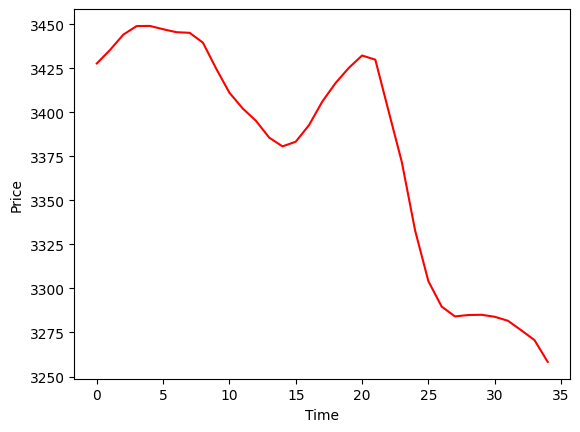

In [58]:
plt.plot(Pred_price, color = 'red', label = 'TCS Stock')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend